# Python Visualization Tutorial
A quick rundown of some tools that you might find useful😃

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt

# Load and Inspect Data:

In [11]:
bird_strikes = pd.read_csv("birds.csv",encoding = "ISO-8859-1")

In [82]:
bird_strikes.head()

,Aircraft: Type,Aircraft: Mass,Airport: Name,Airport: Code,Cost: Aircraft time out of service (hours),Aircraft: Make/Model,Airport: Search Str,Airport: Short Code,Unnamed: 8,Airport: City,...,Wildlife: Kind,Wildlife: Species ID,Speed (IAS) in knots,Origin State Code,When: Time (HHMM),When: Time of day,Aircraft: Type of Engine,Pilot warned of birds or wildlife?,timestamp,hour_of_day
0,Airplane,"2,251-5,700 kg",WILDER ARPT,6.00E+05,NaN,BE-90 KING,6E5: WILDER ARPT,6.00E+05,NaN,NaN,...,Bird,NE1,95.0,SD,1200.0,Day,Turboprop,N,2009-08-25 12:00:00,12.00
1,Airplane,"2,250 kg or less",ANIMAS AIR PARK,00C,6480.0,C-210 CENTUR,00C: ANIMAS AIR PARK,00C,NaN,NaN,...,Mammal,1G12,90.0,CO,1830.0,Night,Reciprocating,N,2004-01-16 18:30:00,18.50
2,Airplane,"2,250 kg or less",ANIMAS AIR PARK,00C,36.0,C-210 CENTUR,00C: ANIMAS AIR PARK,00C,NaN,NaN,...,Mammal,1G12,90.0,CO,1845.0,NaN,Reciprocating,N,2007-03-09 18:45:00,18.75
3,Airplane,"2,250 kg or less",THIGPEN FIELD ARPT,00M,NaN,PA-32,00M: THIGPEN FIELD ARPT,00M,NaN,NaN,...,Mammal,1G11,NaN,MS,NaN,NaN,Reciprocating,NaN,NaT,NaN
4,Airplane,"2,250 kg or less",MEADOW LAKE ARPT,00V,NaN,PA-38 TOMAHAWK,00V: MEADOW LAKE ARPT,00V,NaN,NaN,...,Mammal,1G12,NaN,CO,NaN,Night,Reciprocating,NaN,NaT,NaN


In [4]:
bird_strikes.columns

Index(['Aircraft: Type', 'Aircraft: Mass', 'Airport: Name', 'Airport: Code',
       'Cost: Aircraft time out of service (hours)', 'Aircraft: Make/Model',
       'Airport: Search Str', 'Airport: Short Code', 'Unnamed: 8',
       'Airport: City', 'Airport zip code', 'Altitude bin',
       'Wildlife: Number seen', 'Wildlife: Number struck', 'COMMENTS',
       'Cost: Other (inflation adj)', 'Cost: Repair (inflation adj)',
       'Cost: Total $', 'Miles from airport', 'Effect: Impact to flight',
       'Effect: Other', 'Location: Nearby if en route', 'Location: FAA Region',
       'Aircraft: Flight Number', 'Feet above ground', 'FlightDate',
       'Record ID', 'Effect: Indicated Damage', 'Location: Freeform en route',
       'Number of human fatalities', 'Number of people injured',
       'Aircraft: Number of engines?', 'Number Damaged', 'Number of Strikes',
       'Aircraft: Airline/Operator', 'Aircraft: Operator ID', 'Origin State',
       'When: Phase of flight', 'Conditions: Precipitat

## How Messy is this Dataset?

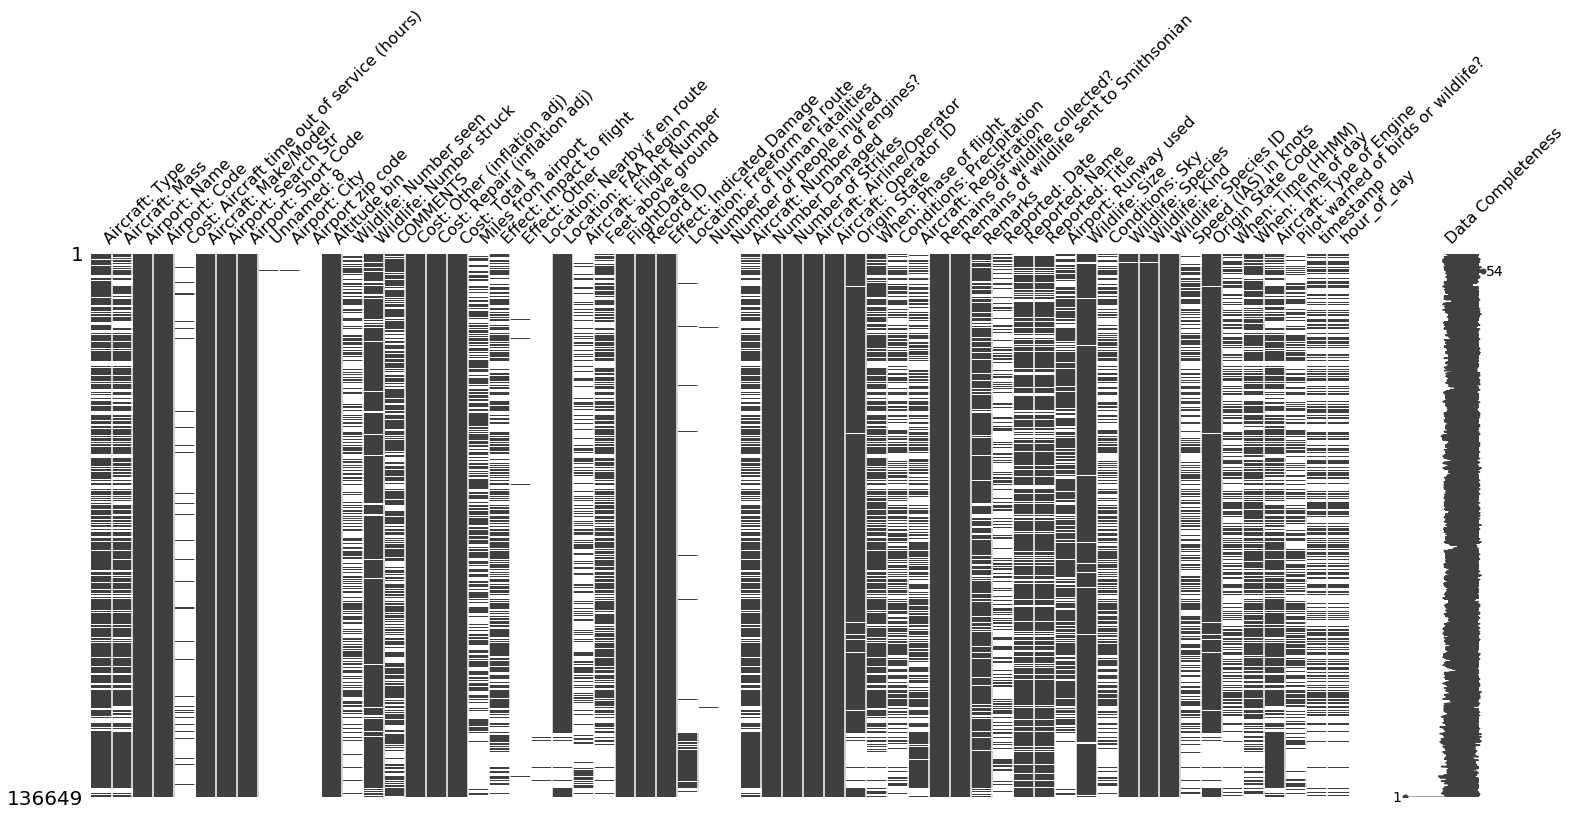

In [34]:
msno.matrix(bird_strikes,labels = True)

## Are Some Columns Missing in Relation to Others?

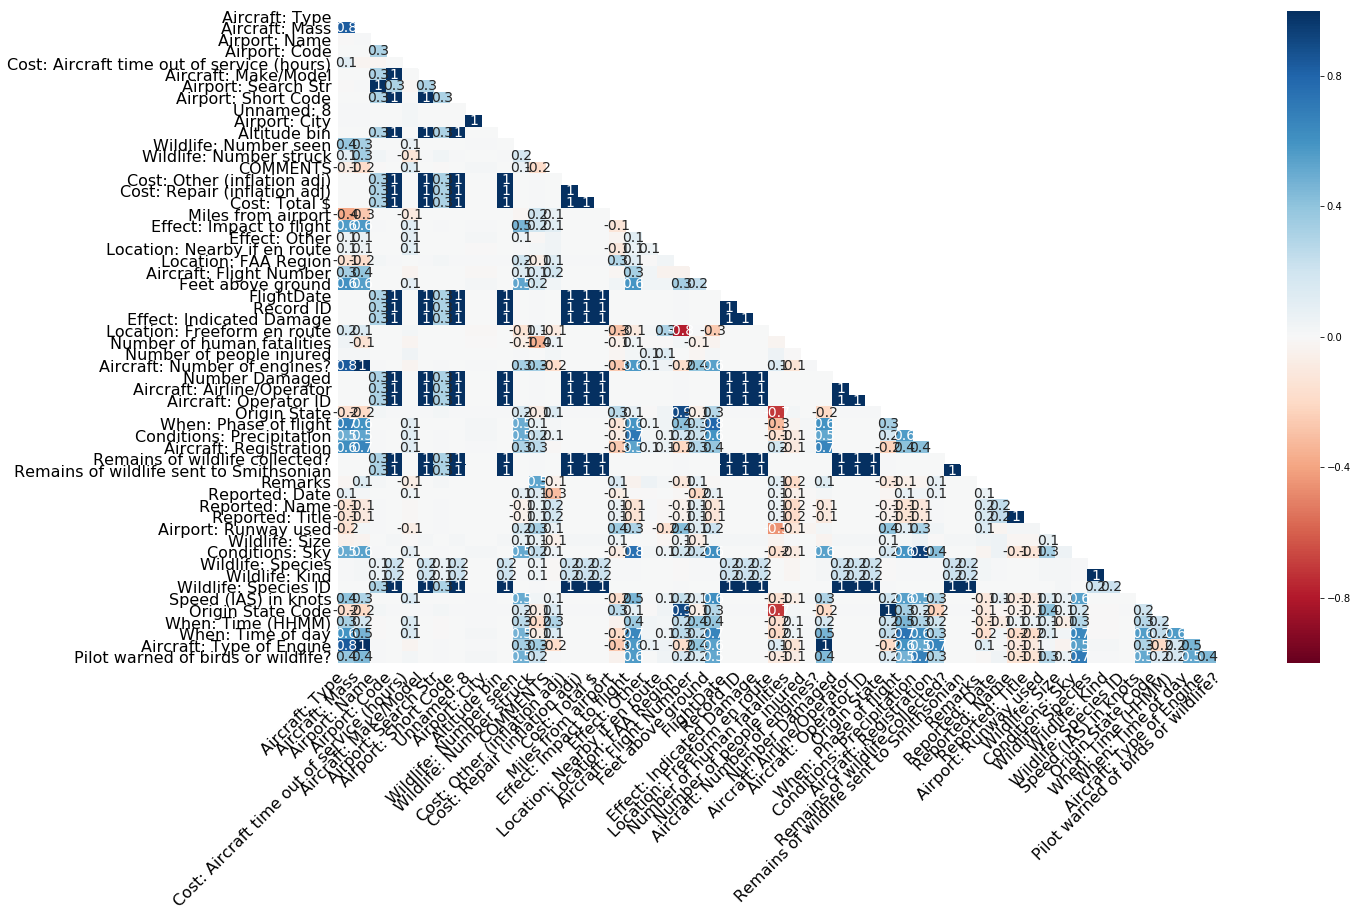

In [9]:
msno.heatmap(bird_strikes, labels = True)

## What time of day do strikes occur?
Need to do a little data cleaning first:

In [27]:
def hhmm_to_seconds(hhmm):
    if np.isnan(hhmm):
        return None
    else:
        hhmm = str(hhmm)
        hours = float(hhmm[:-4]) if hhmm[:-4] else 0
        minutes = float(hhmm[-4:]) if hhmm[-4:] else 0
        return (hours*60*60) + (minutes*60)

bird_strikes ["timestamp"] = pd.to_datetime(bird_strikes["FlightDate"])\
                           + pd.to_timedelta(bird_strikes["When: Time (HHMM)"].map(hhmm_to_seconds),
                                            unit = "s")

bird_strikes["hour_of_day"] = bird_strikes["timestamp"].dt.hour + \
                              bird_strikes["timestamp"].dt.minute / 60

## Plot with `sns.distplot`:
A useful little function, one of the first things I call on a variable I'm inspecting.
Doccumentation [here](https://seaborn.pydata.org/generated/seaborn.distplot.html).

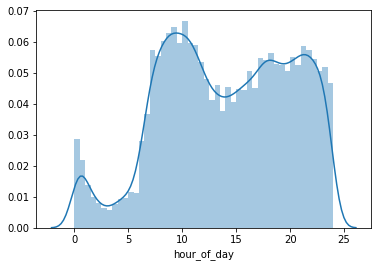

In [32]:
sns.distplot(bird_strikes["hour_of_day"].dropna())

## Plot is a little small for this presentation, let's try using a stylesheet:
Conveniently, `seaborn` wraps `matplotlib` so we can operate on the output using pyplot.

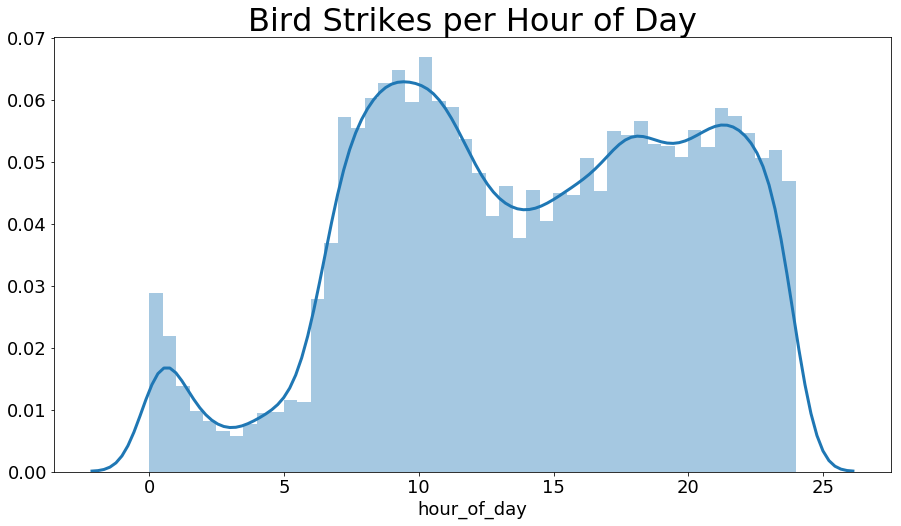

In [42]:
with plt.style.context('presentation.mplstyle'):
    sns.distplot(bird_strikes["hour_of_day"].dropna())
    plt.title("Bird Strikes per Hour of Day")

# Does the type of collision change depending on time of day?

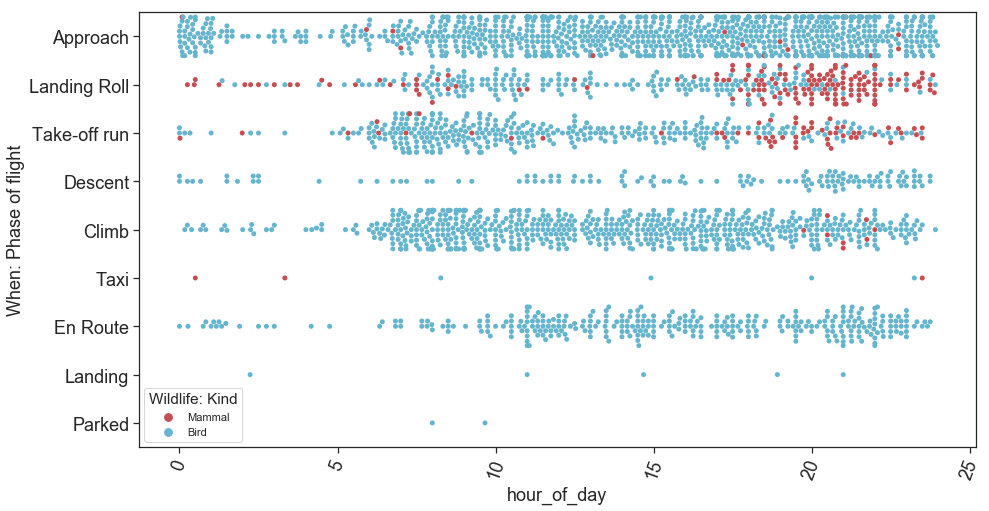

In [77]:
# Draw a categorical scatterplot to show each observation
with plt.style.context('presentation.mplstyle'):
    sns.swarmplot(y='When: Phase of flight', x="hour_of_day", hue="Wildlife: Kind",
                  palette=["r", "c", "y"], data=bird_strikes[bird_strikes["Cost: Total $"]!=0])
    plt.xticks(rotation=70)

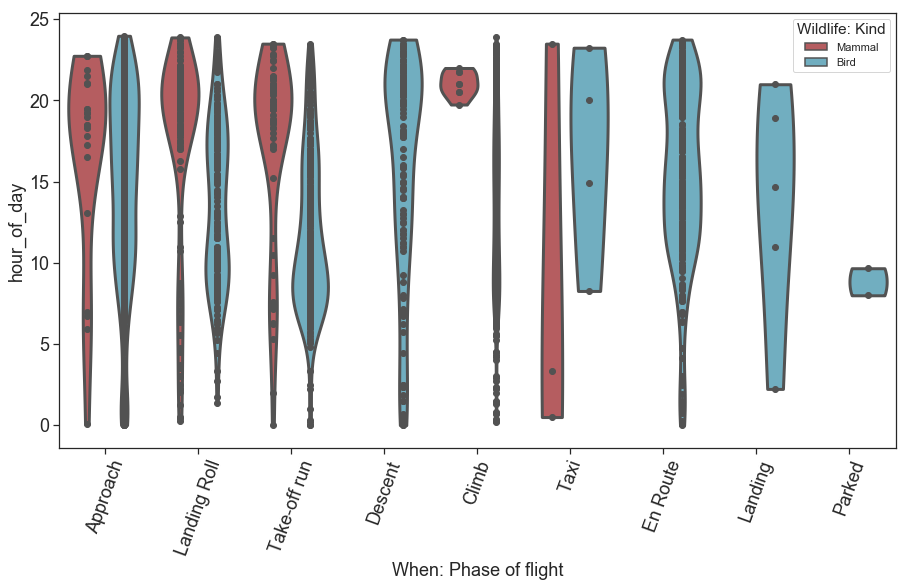

In [83]:
# Draw a categorical scatterplot to show each observation
with plt.style.context('presentation.mplstyle'):
#     plt.figure(figsize = (10,20))
    sns.violinplot(x='When: Phase of flight', y="hour_of_day", hue="Wildlife: Kind", cut = 0,
                  palette=["r", "c", "y"], inner = 'point',
                  data=bird_strikes[bird_strikes["Cost: Total $"]!=0])
    plt.xticks(rotation=70) 

# Misc. Examples:

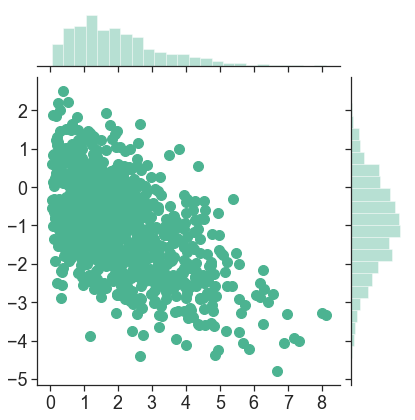

In [85]:
sns.set(style="ticks")
with plt.style.context('presentation.mplstyle'):
    rs = np.random.RandomState(11)
    x = rs.gamma(2, size=1000)
    y = -.5 * x + rs.normal(size=1000)

    sns.jointplot(x, y, kind="scatter", color="#4CB391")  

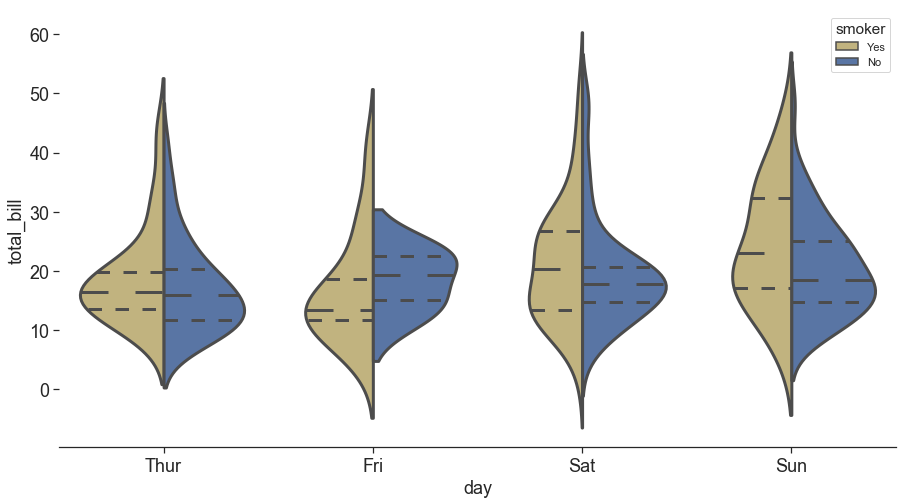

In [66]:
with plt.style.context('presentation.mplstyle'):
    # Load the example tips dataset
    tips = sns.load_dataset("tips")

    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(x="day", y="total_bill", hue="smoker",
                   split=True, inner="quart",
                   palette={"Yes": "y", "No": "b"},
                   data=tips)
    sns.despine(left=True)

# Conclusion:
Seaborn is great for building publication-quality statistical visualizations in not much time at all!
### Resources:
- Seaborn Docs: [https://seaborn.pydata.org/](https://seaborn.pydata.org/) (lots of great examples!)
- This Notebook - Up on github soon!